In [1]:
library(ggplot2)

df <- read.csv('output/fish/metrics.csv', sep=',', stringsAsFactors=F)

head(df)

experiment,marker,train_auc,valid_auc,train_loss,valid_loss,execution_time
0,13q14,0.9995373,0.9948980,0.1409977,0.1690253,128.4952
1,13q14,0.9924648,0.9387755,0.2389015,0.3645539,159.5012
2,13q14,0.9938033,0.9910714,0.2133712,0.2116407,140.2060
3,13q14,0.9966290,0.9413265,0.1785721,0.3468005,166.4906
4,13q14,0.9992624,0.9711934,0.1454477,0.2382303,155.5170
5,13q14,0.9985576,0.9657064,0.1442868,0.2624729,161.7178


In [2]:
cat <- read.csv('data/fish_category.csv', sep=',', stringsAsFactors=F)
cat

fish,category
11p15,Hyperdiploid Copy Number Gain
15q15,Hyperdiploid Copy Number Gain
19q13,Hyperdiploid Copy Number Gain
20q13,Hyperdiploid Copy Number Gain
21q22,Hyperdiploid Copy Number Gain
3q21,Hyperdiploid Copy Number Gain
5q31,Hyperdiploid Copy Number Gain
7q22,Hyperdiploid Copy Number Gain
9q33,Hyperdiploid Copy Number Gain
t(11;14) - CCND1,Translocation


In [3]:
df[df=="t_11_14_ccnd1"]<- "t(11;14) - CCND1"
df[df=="t_14_16_maf"] <- "t(14;16) - MAF"
df[df=="t_4_14_whsc1"] <- "t(4;14) - WHSC1"
df[df=="t_8_14_myc"] <- "t(8;14) - MYC"
df[df=="hyperdiploid_flag"] <- "Hyperdiploid"

df.mean <- aggregate(. ~ marker, FUN=mean, data=df)

df.mean

marker,experiment,train_auc,valid_auc,train_loss,valid_loss,execution_time
11p15,4.5,0.9920897,0.9417057,0.20119630,0.31448932,177.99431
13q14,4.5,0.9967568,0.9643849,0.17429860,0.26653384,155.77288
13q34,4.5,0.9964658,0.9688036,0.16214869,0.24969944,139.52572
15q15,4.5,0.9980057,0.9786758,0.14184141,0.23111055,249.53965
17p13,4.5,0.9518454,0.8197917,0.22482243,0.30418081,100.75675
19q13,4.5,0.9939257,0.9626291,0.18869437,0.27982737,232.98174
1q21,4.5,0.9969591,0.9627235,0.18380812,0.28074800,133.89143
20q13,4.5,0.9816819,0.8004112,0.11071546,0.17189564,95.02166
21q22,4.5,0.9983333,0.9715626,0.17714966,0.25759712,117.54800
3q21,4.5,0.9977014,0.9598726,0.20741594,0.31570121,170.51956


In [4]:
df <- merge(df.mean, cat, by.x='marker', by.y='fish')

df

marker,experiment,train_auc,valid_auc,train_loss,valid_loss,execution_time,category
11p15,4.5,0.9920897,0.9417057,0.20119630,0.31448932,177.99431,Hyperdiploid Copy Number Gain
13q14,4.5,0.9967568,0.9643849,0.17429860,0.26653384,155.77288,Copy Number Deletion
13q34,4.5,0.9964658,0.9688036,0.16214869,0.24969944,139.52572,Copy Number Deletion
15q15,4.5,0.9980057,0.9786758,0.14184141,0.23111055,249.53965,Hyperdiploid Copy Number Gain
17p13,4.5,0.9518454,0.8197917,0.22482243,0.30418081,100.75675,Copy Number Deletion
19q13,4.5,0.9939257,0.9626291,0.18869437,0.27982737,232.98174,Hyperdiploid Copy Number Gain
1q21,4.5,0.9969591,0.9627235,0.18380812,0.28074800,133.89143,Copy Number Gain
20q13,4.5,0.9816819,0.8004112,0.11071546,0.17189564,95.02166,Hyperdiploid Copy Number Gain
21q22,4.5,0.9983333,0.9715626,0.17714966,0.25759712,117.54800,Hyperdiploid Copy Number Gain
3q21,4.5,0.9977014,0.9598726,0.20741594,0.31570121,170.51956,Hyperdiploid Copy Number Gain


In [5]:
windowsFonts()

$serif
[1] "TT Times New Roman"

$sans
[1] "TT Arial"

$mono
[1] "TT Courier New"

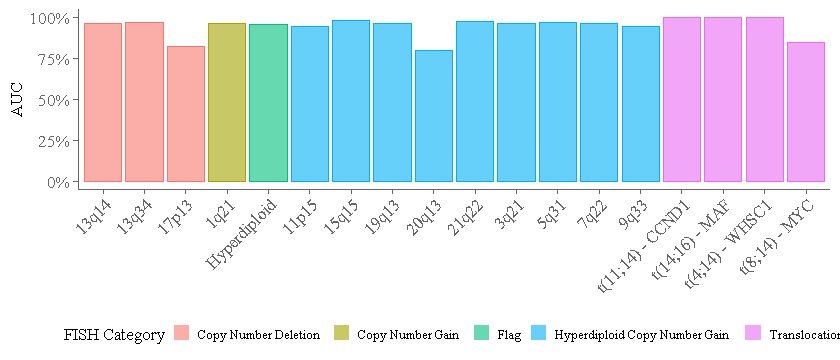

In [14]:
fish.levels <- sort(as.character(unique(cat$category)))

df$category <- factor(df$category, levels = fish.levels)

df <- df[order(df$category),]

df$marker <- factor(df$marker, levels = df$marker[order(df$category)])

ticks.line.color='grey40'

p <- ggplot(df, 
                aes(x = marker, 
                    y = valid_auc, 
                    colour = category,
                    fill = category)) + 
  geom_bar(stat = "identity", alpha = .6, size = 0.3) +
  scale_fill_hue(name    = 'FISH Category', 
                 labels  = fish.levels) +
  scale_colour_hue(guide = "none") +
  scale_y_continuous(labels = scales::percent) +
  xlab(NULL) + 
  ylab("AUC") +
  theme_bw() + 
  theme(panel.border          = element_blank(), 
        panel.grid.major      = element_blank(),
        panel.grid.minor      = element_blank(), 
        axis.line             = element_line(colour=ticks.line.color),
        text                  = element_text(size=10, family="serif"),
        legend.key.size       = unit(10, "pt"),
        legend.position       = 'bottom',
        axis.text.x           = element_text(size=10, angle=45, hjust=1, colour=ticks.line.color),
        axis.text.y           = element_text(size=10, colour=ticks.line.color),
        axis.title.x          = element_text(vjust=1),
        axis.ticks            = element_line(color=ticks.line.color),
        plot.background       = element_rect(fill = "transparent", color=NA), # bg of the plot
        legend.box.background = element_rect(color=NA, fill = "transparent"), # get rid of legend panel bg
        legend.background     = element_rect(colour=NA, size=0),
        legend.key            = element_rect(fill="transparent", colour=NA) # get rid of key legend fill, 
                                                                                #and of the surrounding
       )

options(repr.plot.width=7, repr.plot.height=3)

ggsave('images/fish_auc.pdf', p, units='cm', heigh=6.5, width=18, bg="transparent")

p